In [1]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
import random
import sys
np.set_printoptions(threshold=sys.maxsize)


menor = np.loadtxt("esn_big_minstable_r3.9_x0.1_d1000.csv", delimiter=",")
list_of_x0 = np.loadtxt("esn_random_x0.1_r3.9.csv", delimiter=" ")


In [2]:
err_px = np.zeros((menor.shape[0],2))

for i in range(menor.shape[0]):
    err_px[i,0] = list_of_x0[i]
    err_px[i,1] = menor[i,3]

err_px = err_px[err_px[:,0].argsort()]

print(err_px)

[[9.50625012e-02 1.29588590e-03]
 [9.50628112e-02 8.77971879e-04]
 [9.50629765e-02 1.56519796e-03]
 [9.50633458e-02 1.36612395e-03]
 [9.50649805e-02 1.61889281e-03]
 [9.50658894e-02 2.13452507e-03]
 [9.50665546e-02 1.52011858e-03]
 [9.50670966e-02 1.34251183e-03]
 [9.50679701e-02 1.65169215e-03]
 [9.50697197e-02 1.12481429e-03]
 [9.50706000e-02 1.50652383e-03]
 [9.50716766e-02 1.26419980e-03]
 [9.50726810e-02 2.07993872e-03]
 [9.50729474e-02 1.75917492e-03]
 [9.50742046e-02 1.03980584e-03]
 [9.50813915e-02 1.23874809e-03]
 [9.50834243e-02 1.53774541e-03]
 [9.50839714e-02 8.45594898e-04]
 [9.50855324e-02 1.62267216e-03]
 [9.50868421e-02 1.84209069e-03]
 [9.50947045e-02 7.09731299e-04]
 [9.51006732e-02 1.40492029e-03]
 [9.51013090e-02 1.29628384e-03]
 [9.51030789e-02 1.10193288e-03]
 [9.51039218e-02 6.31243081e-04]
 [9.51046596e-02 1.30571398e-03]
 [9.51086775e-02 5.63970500e-04]
 [9.51128635e-02 1.25422098e-03]
 [9.51133569e-02 3.13468537e-03]
 [9.51197364e-02 1.42060586e-03]
 [9.512291

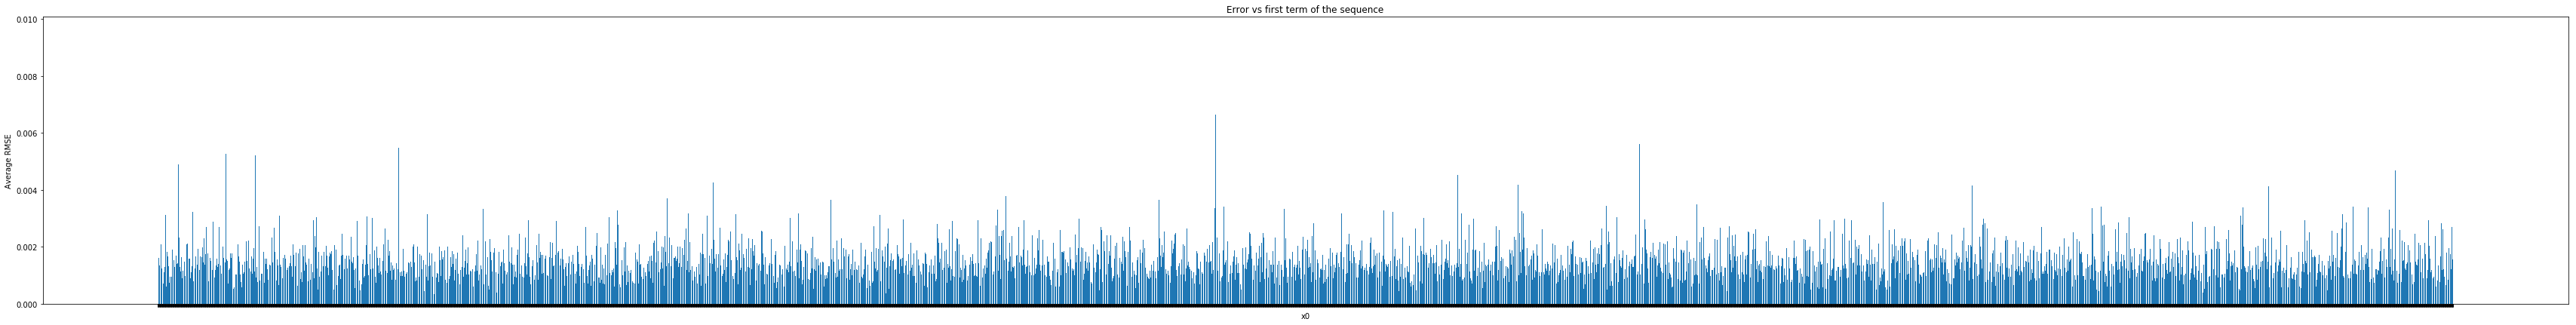

In [15]:
ind = np.arange(menor.shape[0])

label = []


plt.figure(figsize=(60,7))
plt.bar(ind, err_px[:,1])
plt.xticks(ind,label, fontsize=10, rotation=30)
plt.title('Error vs first term of the sequence')
plt.ylabel('Average RMSE')
plt.xlabel('x0')
plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [ 205.  685.  396.  789.  668.  449.  401.  440.  842. 1491.] [ 45. 205. 115. 208. 174. 103. 146. 105. 191. 397.]
[0.03103662 0.11049038 0.06343886 0.12377405 0.10453135 0.06852886
 0.06790813 0.06765984 0.12824333 0.23438858] [nan nan nan nan nan nan nan nan nan nan] [0.03220232 0.10760289 0.06220547 0.12393968 0.10493245 0.07053095
 0.06299089 0.06911719 0.13226516 0.23421301] [0.02664298 0.12137359 0.06808763 0.12314979 0.10301954 0.06098283
 0.08644168 0.06216696 0.11308467 0.23505033]
oi [nan nan nan nan nan nan nan nan nan nan] [1.03755891 0.97386661 0.98055779 1.00133813 1.00383719 1.02921516
 0.92758978 1.02153931 1.03136094 0.99925094] [0.85843694 1.09849921 1.0732795  0.99495645 0.98553727 0.88988532
 1.27292092 0.9188163  0.88179766 1.00282329]


/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


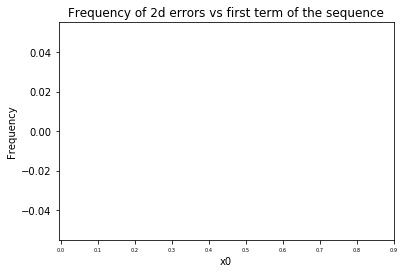

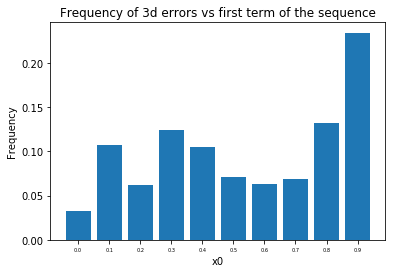

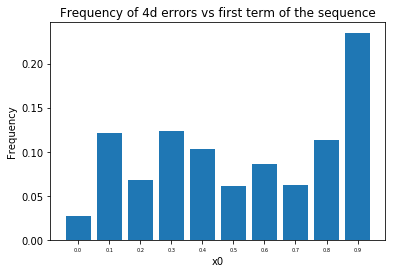

oi [nan nan nan nan nan nan nan nan nan nan] [1.03755891 0.97386661 0.98055779 1.00133813 1.00383719 1.02921516
 0.92758978 1.02153931 1.03136094 0.99925094] [0.85843694 1.09849921 1.0732795  0.99495645 0.98553727 0.88988532
 1.27292092 0.9188163  0.88179766 1.00282329]


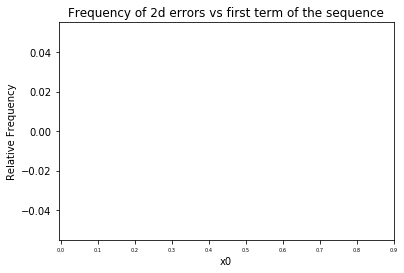

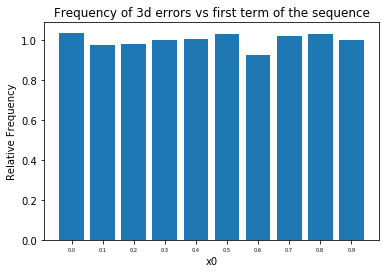

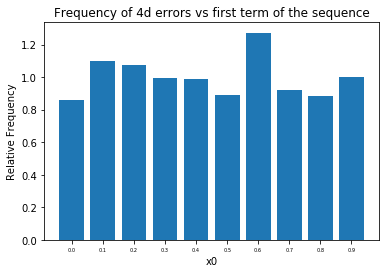

In [16]:
div = 10

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.] [  0.   0.   0.   0.   0.   0.   0.   0.   0. 205. 135.  80.  63.  55.
  89.  70.  53.  41.  44.  55.  49.  48.  34.  37.  55.  38.  38.  32.
  28.  37.  34.  35.  50. 130. 120. 100.  92.  75.  72.  81.  89.  66.
  71. 101.  68.  46.  46.  74.  55.  52.  56.  44.  40.  51.  45.  50.
  41.  40.  28.  54.  39.  37.  51.  51.  37.  37.  36.  40.  37.  36.
  41.  32.  45.  39.  47.  53.  45.  49.  45.  44.  57.  46.  48.  48.
  64.  61. 101. 159. 130. 128. 127. 128. 125. 132. 189. 207. 224. 359.
   0.   0.] [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 45. 32. 27. 15. 23. 23. 24. 23. 12.
 11. 15. 13. 15.  9.  9. 12. 11. 12. 12.  7. 15.  8.  6. 10. 36. 27. 28.
 31. 23. 24. 15. 22. 21. 29. 12. 23.  9

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


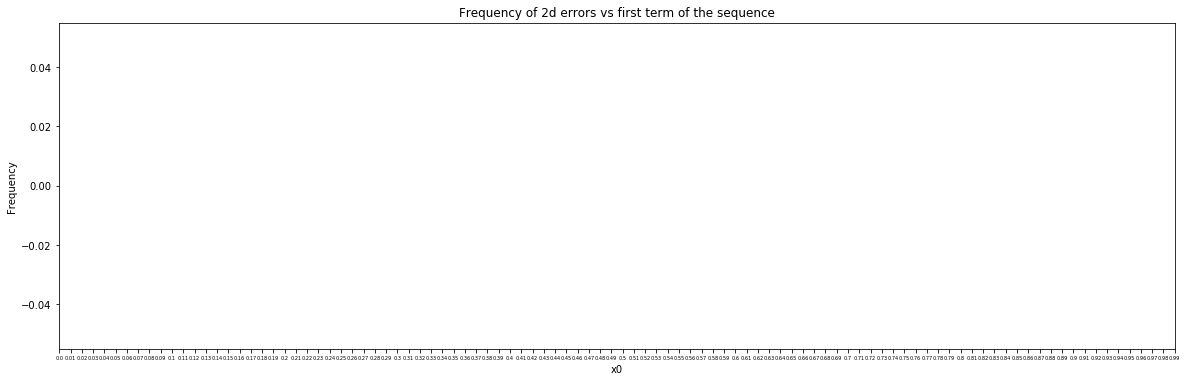

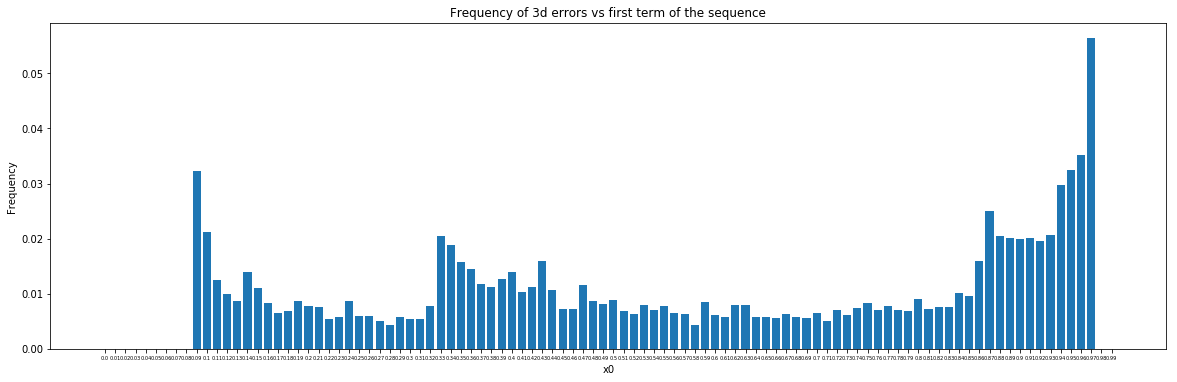

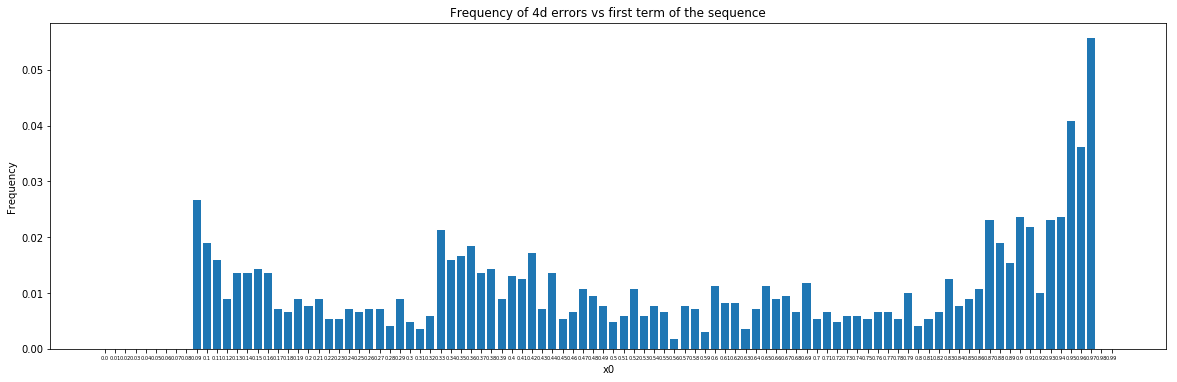

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


oi [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan] [       nan        nan        nan        nan        nan        nan
        nan        nan        nan 1.03755891 1.02286003 0.94603046
 1.02198579 0.89220982 1.00547411 0.9422564  0.88239124 0.97882916
 1.01225259 0.99417665 1.0000076  0.96405009 1.00048221 1.01775396
 1.03869203 0.98126527 0.96163996 0.92022963 1.01225259 0.90032081
 1.02430322 1.08014758 1.05442978 0.99090992 1.03291081 0.98852792
 0.94641502 0.96835388 0.9489868  1.06761016 1.01453244 0.9598947
 0.89837418 1.13094593 0.94551066 1.05826407 1.021132   1.01775396
 0.98017416 1.01225259 1.10715127 1.03099801 0.87263154

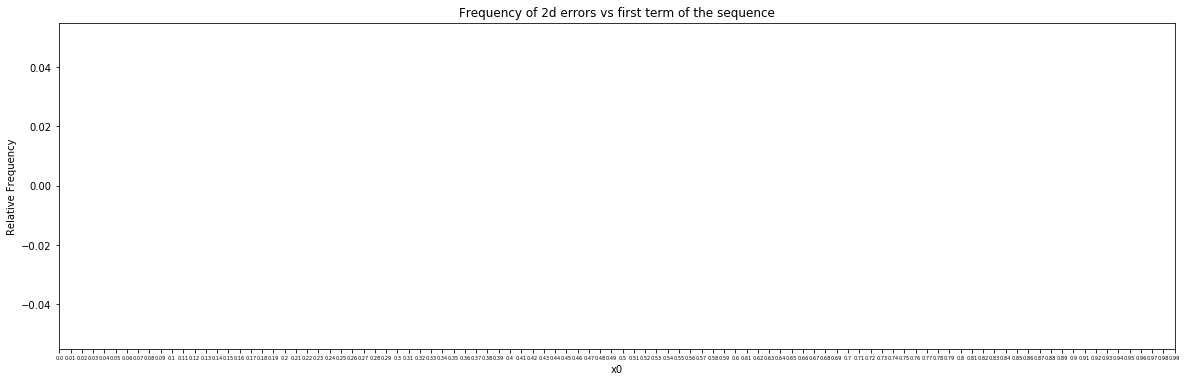

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


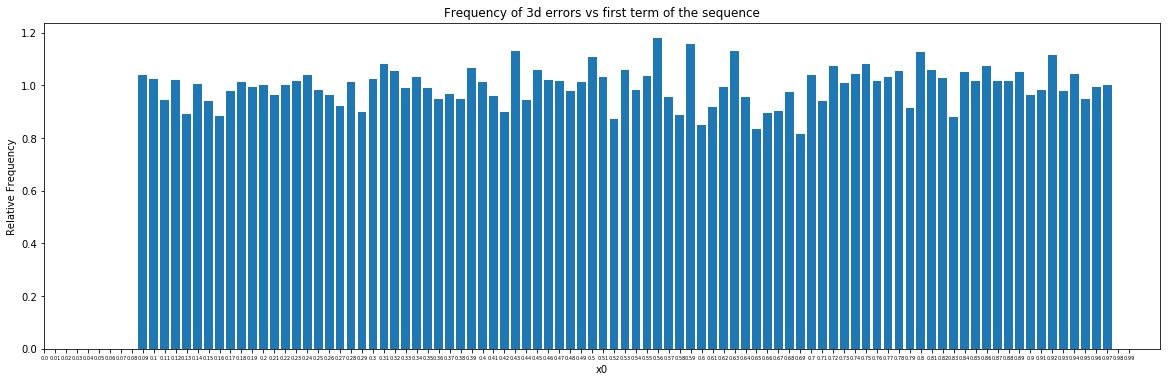

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide


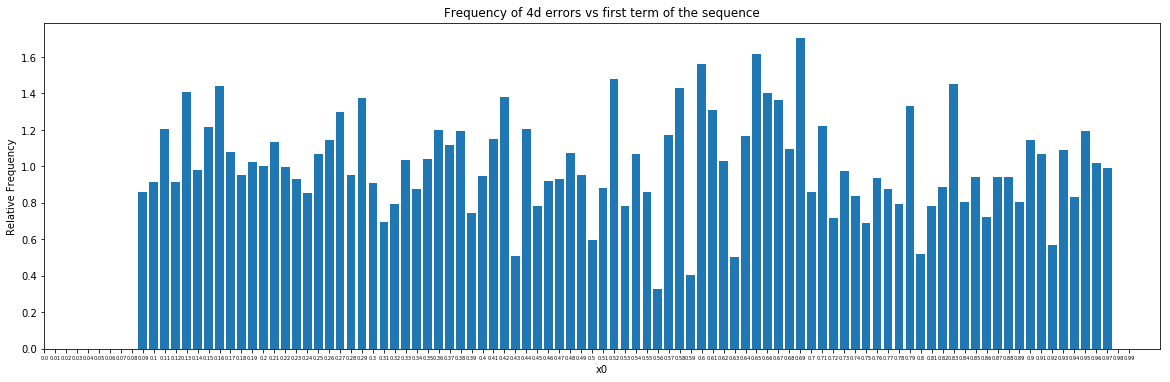

In [17]:
div = 100

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


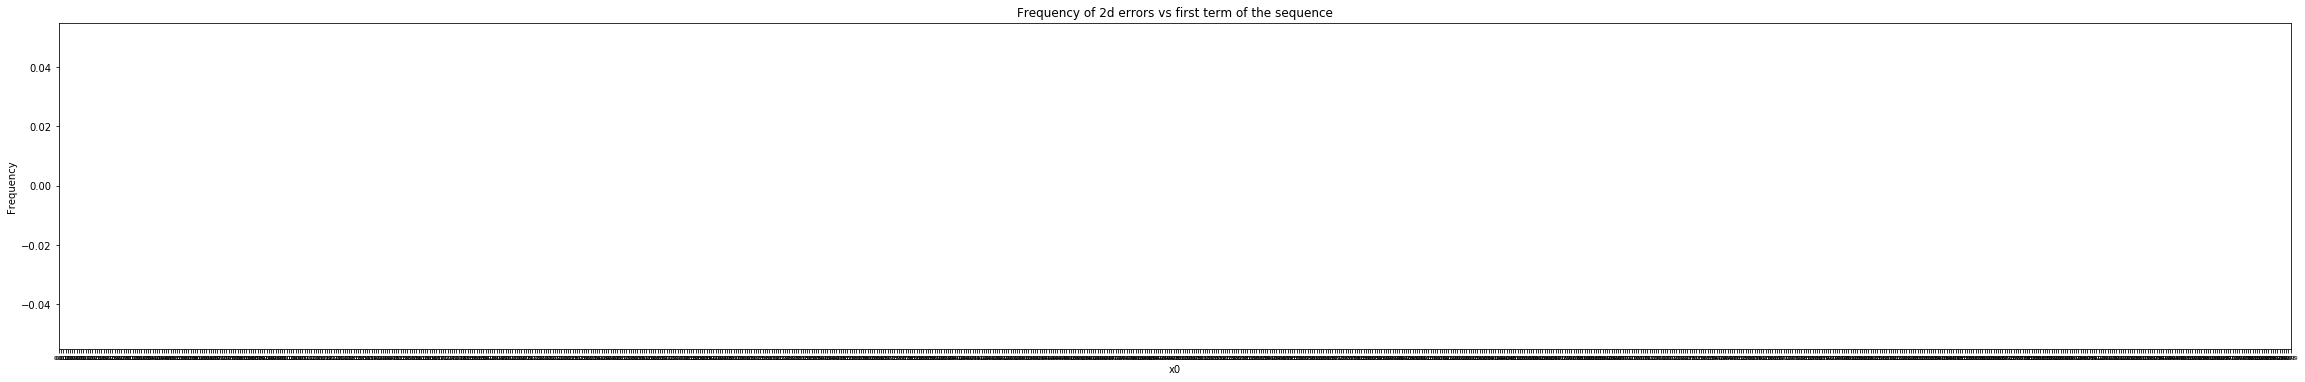

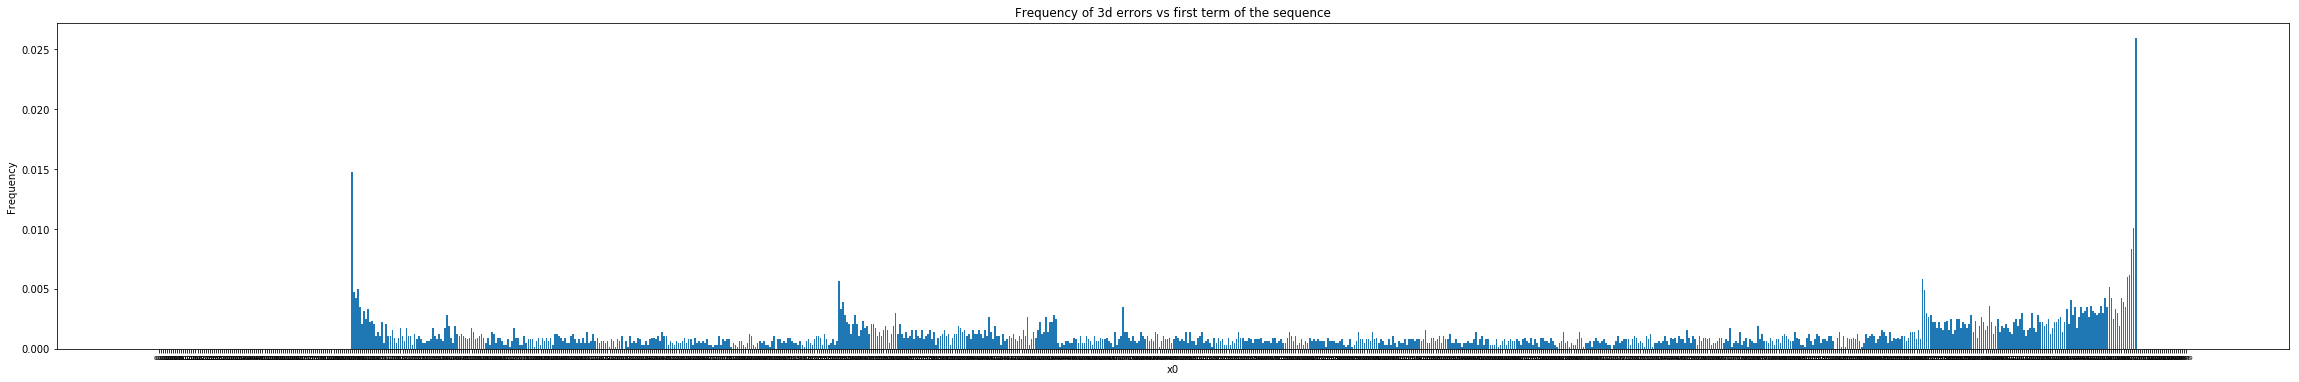

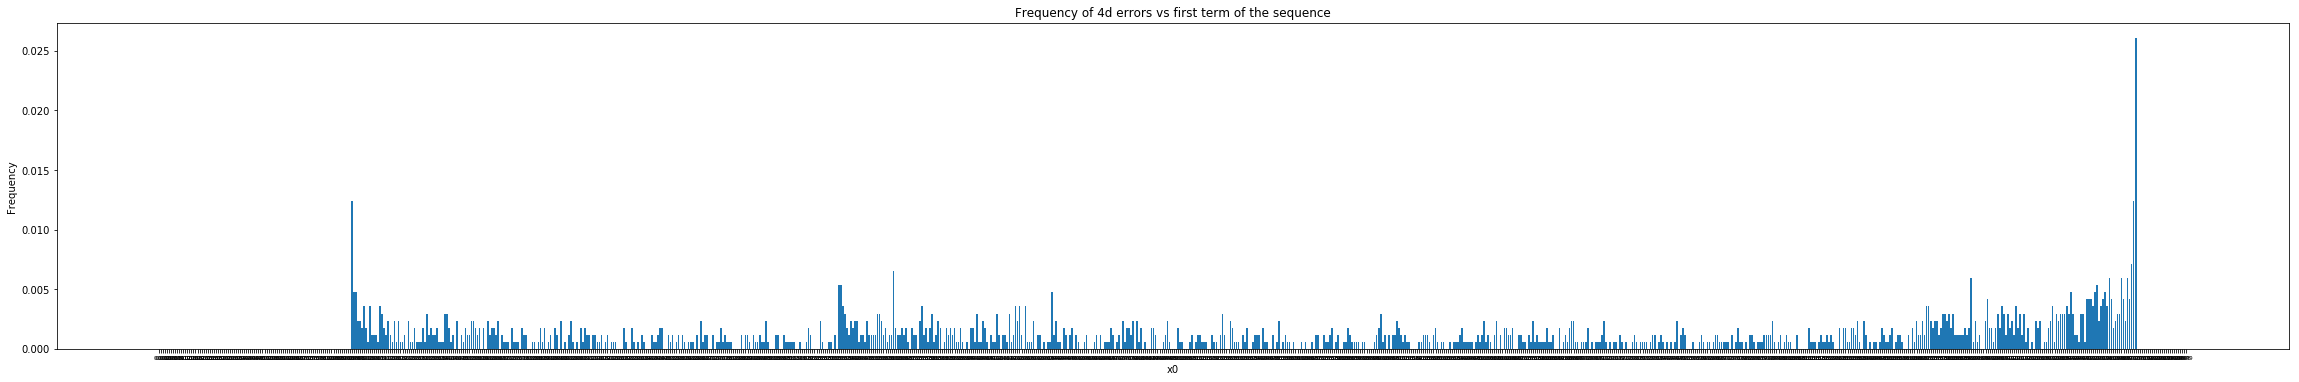

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


oi [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan

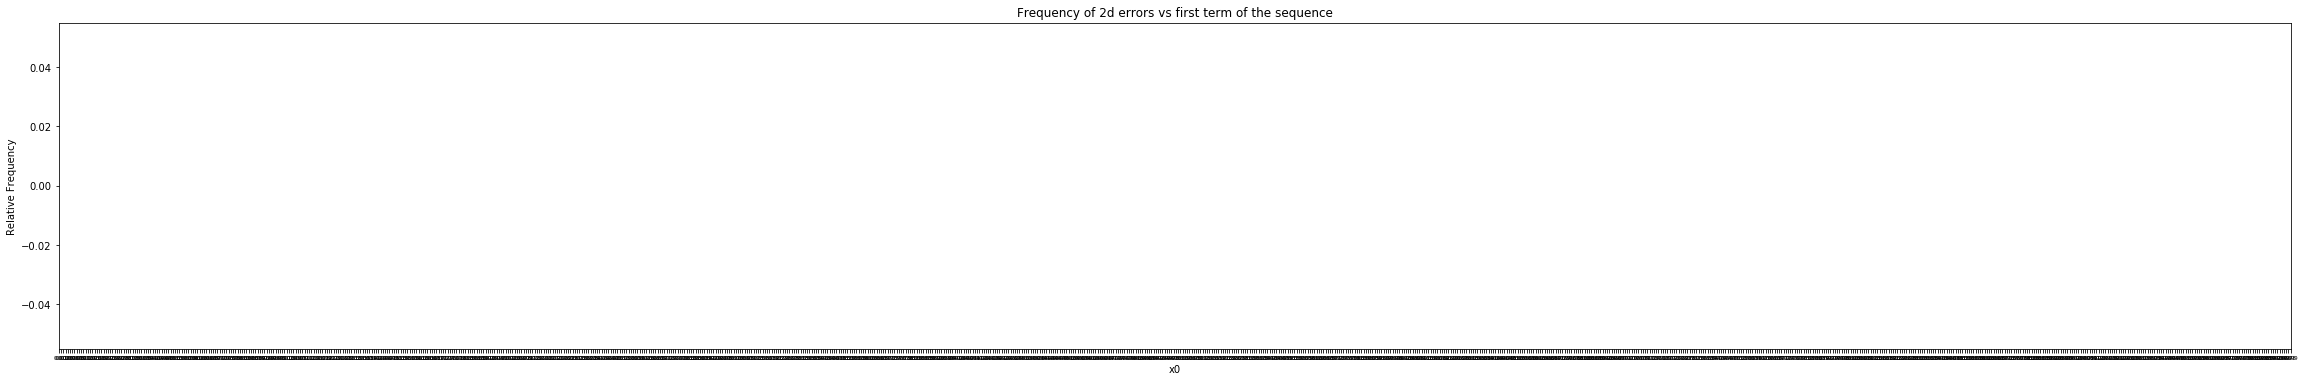

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


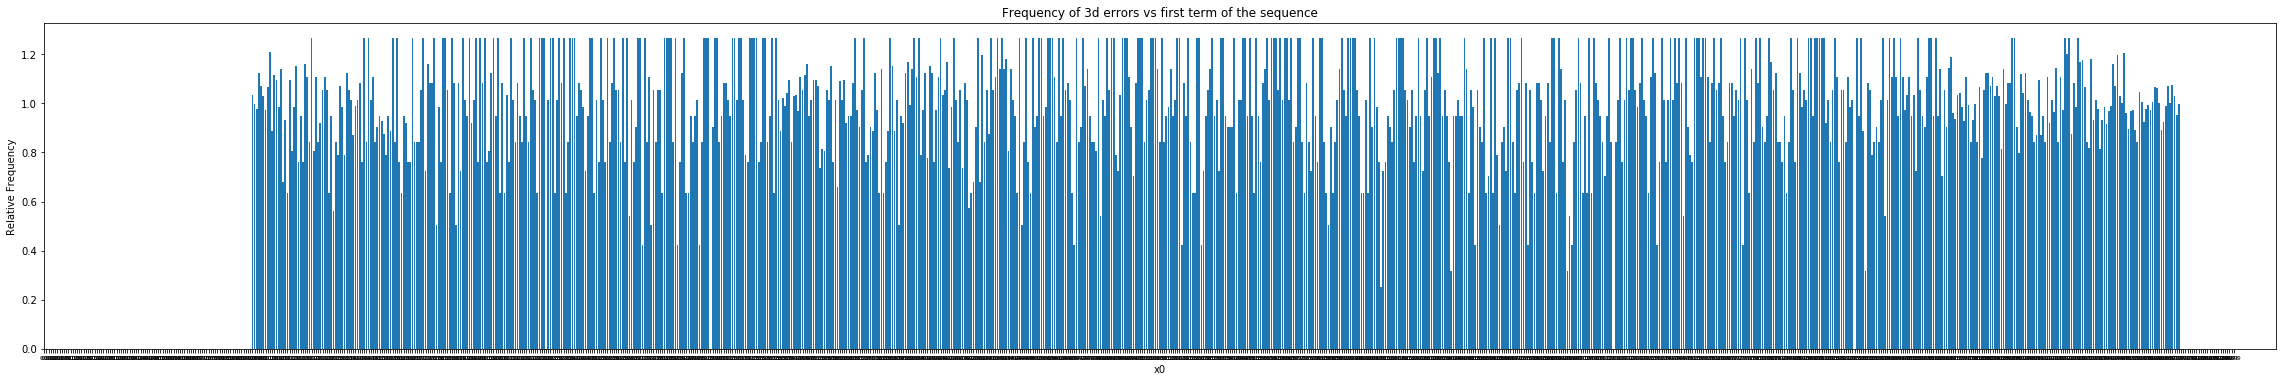

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide


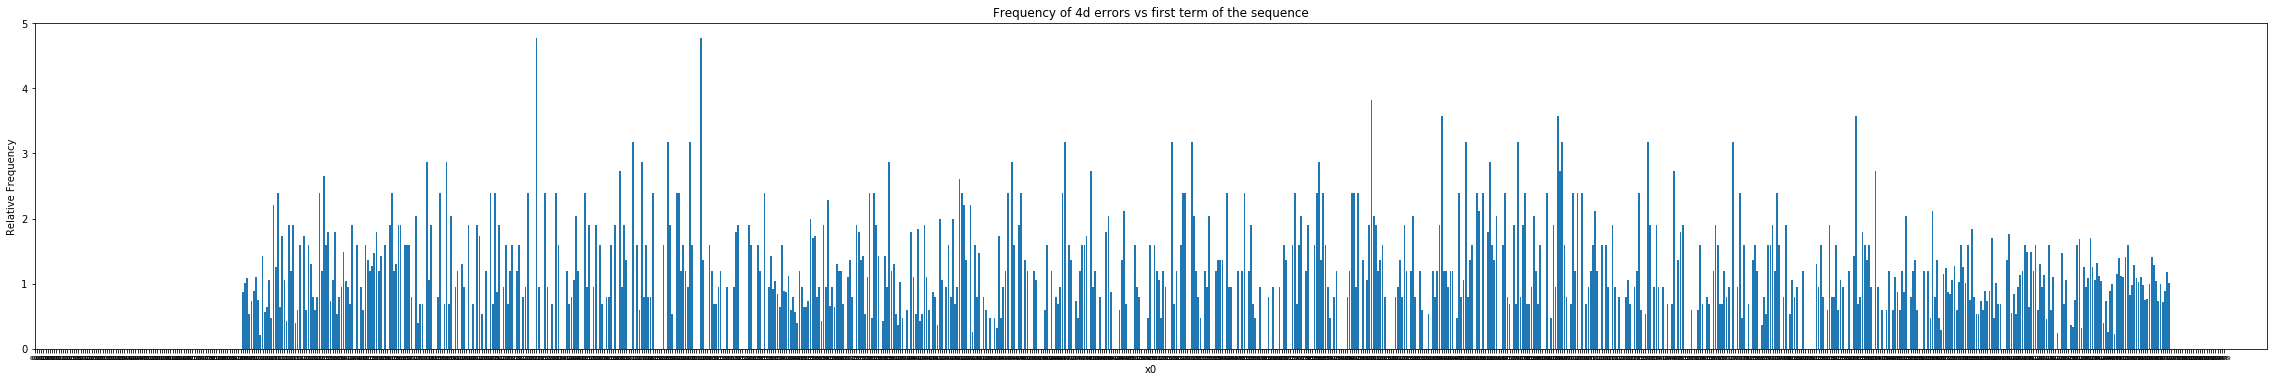

In [18]:
div = 1000

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()